<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/Meta_Llama_3_8B_Instruct_bnb_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U transformers accelerate bitsandbytes

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 330.3 kB/s eta 0:00:01
     -------------------------- ----------- 30.7/43.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 357.2 kB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)

d:\DL\LLama3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import transformers
import torch

model_id = "NousResearch/Meta-Llama-3-8B-Instruct"

d:\Anaconda3_envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch


torch.cuda.is_available()

True

In [3]:
print(torch.__version__)

2.0.1+cu118


In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    model_id
)
# model = AutoModelForCausalLM.from_pretrained(
#    model_id,
#     device_map="auto",
#     torch_dtype="auto",
# )
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             return_dict=True,
                                             torch_dtype='auto',
                                             device_map='auto',
                                             do_sample=True,
                                             load_in_4bit=True,
                                            )


Downloading: 100%|██████████| 49.8k/49.8k [00:00<00:00, 25.5MB/s]
Downloading: 100%|██████████| 8.66M/8.66M [00:01<00:00, 7.78MB/s]
Downloading: 100%|██████████| 73.0/73.0 [00:00<00:00, 73.3kB/s]


Exception: data did not match any variant of untagged enum PostProcessorWrapper at line 2395 column 3

In [7]:
text = """
유희왕 카드 퀴즈
```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q1. 상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요?
"""


chat = [
    { "role": "system", "content": " You are an artificial intelligence assistant that answers in Korean." },
    { "role": "user", "content": f"{text}" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)


token_ids = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")

with torch.no_grad():
    output_ids = model.generate(
        token_ids.to(model.device),
        do_sample=True,
        temperature=0.6,
        top_p=0.9,
        max_new_tokens=256,
        eos_token_id=[
            tokenizer.eos_token_id,
            tokenizer.convert_tokens_to_ids("<|eot_id|>")
        ],
    )
output = tokenizer.decode(output_ids.tolist()[0][token_ids.size(1) :], skip_special_tokens=True)

print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


😊

하루 우라라의 ① 효과는, 이하의 어느 효과를 포함하는 마법/함정/몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있습니다. 개기일식의 서의 ① 효과는 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 하는 효과입니다.

따라서, 하루 우라라의 ① 효과는 개기일식의 서의 ① 효과를 포함하는 효과입니다. 따라서, 하루 우라라를 발동하여 상대의 효과를 무효화할 수 있습니다! 🎉


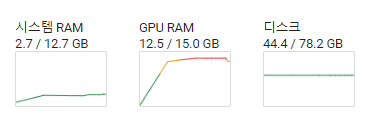

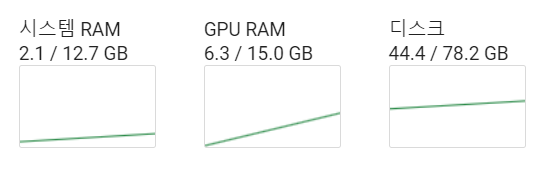